In [1]:
using Pkg
Pkg.activate(".")
Pkg.add("BenchmarkTools")
Pkg.add("DataFrames")
Pkg.add("Erdos")
Pkg.add("PyPlot")
Pkg.add("GraphPlot")
Pkg.add("SimpleWeightedGraphs")
Pkg.add("LinearAlgebra")
Pkg.add("Random")
Pkg.add("CSV")
Pkg.add("Colors")

  Activating new project at `~/Desktop`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed SnoopPrecompile ─ v1.0.3
   Installed Parsers ───────── v2.5.3
    Updating `~/Desktop/Project.toml`
  [6e4b80f9] + BenchmarkTools v1.3.2
    Updating `~/Desktop/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.3.2
  [682c06a0] + JSON v0.21.3
  [69de0a69] + Parsers v2.5.3
  [21216c6a] + Preferences v1.3.0
  [66db9d55] + SnoopPrecompile v1.0.3
  [56f22d72] + Artifacts
  [ade2ca70] + Dates
  [8f399da3] + Libdl
  [37e2e46d] + LinearAlgebra
  [56ddb016] + Logging
  [a63ad114] + Mmap
  [de0858da] + Printf
  [9abbd945] + Profile
  [9a3f8284] + Random
  [ea8e919c] + SHA v0.7.0
  [9e88b42a] + Serialization
  [2f01184e] + SparseArrays
  [10745b16] + Statistics
  [fa267f1f] + TOML v1.0.0
  [cf7118a7] + UUIDs
  [4ec0a83e] + Unicode
  [e66e0078] + CompilerSupportLibraries_jll v0.5.2+0
  [4536629a] + OpenBLAS_jll v0.3.20+0
  [8e850b90] + libblastrampoline_

#### 14.18a

Write a class to model this random attachment model and compute the degree distribution as
well as the cluster distribution. Consider at least N = 1000 nodes and measure D(ℓ), the degree
distribution, for m = 2, 3, and 5 and p = 0.1 and p = 0.9. Average over at least ten trials.

In [80]:
using DataFrames

df = DataFrame(rand([1, 9], 10, 100), :auto) # I change the value of N from 1000 to 100 because my laptop can't handle high value and p from 0.1 and 0.9 to 1 and 9, respectively.
print(df)

10×100 DataFrame
 Row │ x1     x2     x3     x4     x5     x6     x7     x8     x9     x10    x11    x12    x13    x14    x15    x16    x17    x18    x19    x20    x21    x22    x23    x24    x25    x26    x27    x28    x29    x30    x31    x32    x33    x34    x35    x36    x37    x38    x39    x40    x41    x42    x43    x44    x45    x46    x47    x48    x49    x50    x51    x52    x53    x54    x55    x56    x57    x58    x59    x60    x61    x62    x63    x64    x65    x66    x67    x68    x69    x70    x71    x72    x73    x74    x75    x76    x77    x78    x79    x80    x81    x82    x83    x84    x85    x86    x87    x88    x89    x90    x91    x92    x93    x94    x95    x96    x97    x98    x99    x100  
     │ Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int64  Int

In [81]:
using SimpleWeightedGraphs
g = SimpleWeightedGraph(ncol(df))

{100, 0} undirected simple Int64 graph with Float64 weights

In [66]:
Pkg.add("SimpleGraphs")
Pkg.add("Graphs")

   Resolving package versions...
  No Changes to `~/Desktop/Project.toml`
  No Changes to `~/Desktop/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Project.toml`
  No Changes to `~/Desktop/Manifest.toml`


In [82]:
using LinearAlgebra
using GraphPlot
using SimpleWeightedGraphs
using SimpleGraphs
using Graphs

ew = Int[]
pairings = [] 

for i in 1:ncol(df), j in i+1:ncol(df) 
    w = dot(df[!, i], df[!, j])
    if w > 0
        push!(ew, w)
        add_edge!(g, i, j, w)
        push!(pairings,[i,j])
    end
end

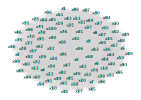

In [99]:
using GraphPlot

gplot(g, nodelabel=names(df), edgelinewidth=ew)